### NDJF met polyfit

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 20 17:34:56 2024

@author: nicolai
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
# NDJF
X = np.array([24, 48, 72, 96, 120]) # duren
Xd = np.arange(start=24,stop=121,step=2)
#y = np.array([0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]) # terugkeertijden
#X,Y=np.meshgrid(x,y) # omvang = # y * # x

#### Verandergetallen

In [3]:
# De z-waarden - verandergetallen
Zdata_raw = np.array([1.244420589,1.218134577,1.198787849,1.186131219,1.180773519]) # => # x's Zie all_scenarios_NDJF.xlsx
Zdata = np.round(Zdata_raw,3)
#1.230282086 # 36 uur via interpolatie
Zdata

array([1.244, 1.218, 1.199, 1.186, 1.181])

In [4]:
p = np.polyfit(X, Zdata, 2)
print(p)

[ 5.95238095e-06 -1.51547619e-03  1.27700000e+00]


In [5]:
print(Zdata)

Zhat = np.polyval(p, X)
print(Zhat)

Zhatd = np.polyval(p, Xd)
#print(Zhatd)

[1.244 1.218 1.199 1.186 1.181]
[1.24405714 1.21797143 1.19874286 1.18637143 1.18085714]


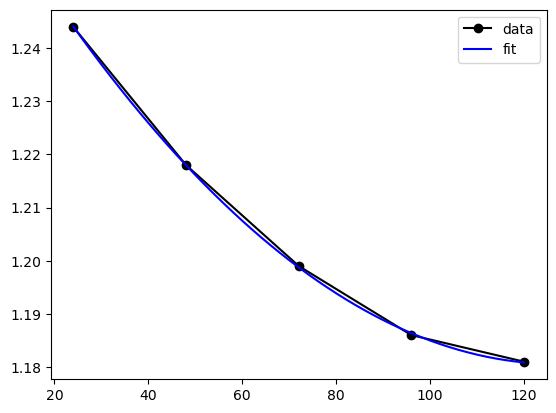

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
linedata, = ax.plot(X,Zdata, linestyle='-', marker='o', label='data', color='k')
linefit, = ax.plot(Xd,Zhatd, linestyle='-', marker='none', label= 'fit', color='b')
ax.legend(handles=[linedata, linefit], loc='best')
plt.show()

[ 5.952e-06 -1.515e-03  1.277e+00]
[1.244 1.218 1.199 1.186 1.181]
[1.24406835 1.21799341 1.19877517 1.18641363 1.1809088 ]


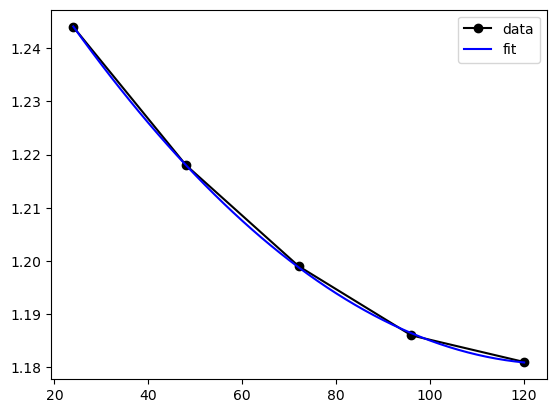

In [7]:
p = np.array([ 5.952e-06, -1.515e-03,  1.277e+00])
print(p)

print(Zdata)

Zhat = np.polyval(p, X)
print(Zhat)

Zhatd = np.polyval(p, Xd)
#print(Zhatd)

fig = plt.figure()
ax = fig.add_subplot(111)
linedata, = ax.plot(X,Zdata, linestyle='-', marker='o', label='data', color='k')
linefit, = ax.plot(Xd,Zhatd, linestyle='-', marker='none', label= 'fit', color='b')
ax.legend(handles=[linedata, linefit], loc='best')
plt.show()

[1.244 1.218 1.199 1.186 1.181]
[ 3.11757216e-04 -4.29699179e-02  1.37787169e+00]
[1.24445973 1.21619856 1.1998057  1.18823695 1.17929906]


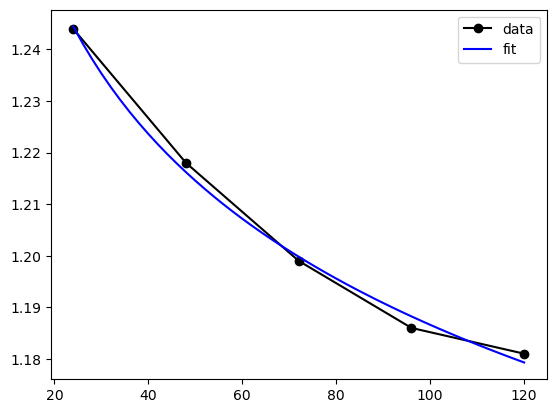

In [8]:
# Logaritmisch polynoom van orde 2
print(Zdata)

p = np.polyfit(np.log(X), Zdata, 2)
print(p)

Zhat = np.polyval(p, np.log(X))
print(Zhat)

Zhatd = np.polyval(p, np.log(Xd))
#print(Zhatd)

fig = plt.figure()
ax = fig.add_subplot(111)
linedata, = ax.plot(X,Zdata, linestyle='-', marker='o', label='data', color='k')
linefit, = ax.plot(Xd,Zhatd, linestyle='-', marker='none', label= 'fit', color='b')
ax.legend(handles=[linedata, linefit], loc='best')
plt.show()

[ 3.118e-04 -4.297e-02  1.378e+00]
[1.244 1.218 1.199 1.186 1.181]
[1.24458822 1.21632719 1.19993444 1.18836577 1.17942796]


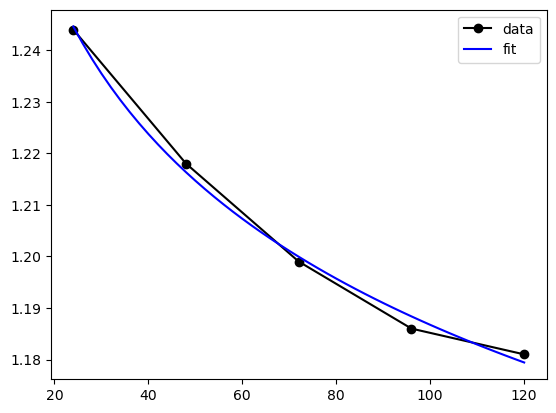

In [9]:
p = np.array([ 3.118e-04, -4.297e-02,  1.378e+00])
print(p)

print(Zdata)

Zhat = np.polyval(p, np.log(X))
print(Zhat)

Zhatd = np.polyval(p, np.log(Xd))
#print(Zhatd)

fig = plt.figure()
ax = fig.add_subplot(111)
linedata, = ax.plot(X,Zdata, linestyle='-', marker='o', label='data', color='k')
linefit, = ax.plot(Xd,Zhatd, linestyle='-', marker='none', label= 'fit', color='b')
ax.legend(handles=[linedata, linefit], loc='best')
plt.show()

NDJF --> Tweedegraads polynoom: 5.952e-06 * D^2 - 1.515e-03 * D + 1.277

In [10]:
def poly(D):
    return 5.952e-06 * D**2 - 1.515e-03 * D + 1.277

In [11]:
poly(36)

1.230173792

In [12]:
def verandergetalfunctie(Ts,D,T=1):
    # Ts: temperatuurstijging in graden Celsius
    # D:  duur in uren
    # T:  terugkeertijd (irrelevante parameter)

    if D < 1/6: 
        raise ValueError(f'Gekozen duur {D} valt buiten domein (10 minuten t/m 240 uur)')
    elif D <= 24:
        v = 1.244
    elif D < 120:
        v = poly(D)
    elif D <= 240:
        v = 1.181
    elif D > 240:
        raise ValueError(f'Gekozen duur {D} valt buiten domein: 10 minuten t/m 10 dagen (240 uur)')
  
    return 1 + (v-1) * Ts/4 # de factor v is afgeleid voor 4 graden temperatuurstijging

In [13]:
print(verandergetalfunctie(8,36))

1.460347584


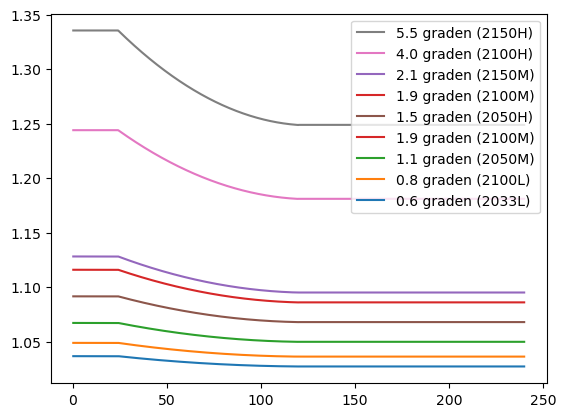

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

temps = np.array([0.6,1,2,4,6])
duren = np.arange(start=1/6,stop=240,step=1/6)

colors = {0: 'tab:blue', 1: 'tab:orange', 2: 'tab:green', 3: 'tab:red', 4: 'tab:purple', 
          5: 'tab:brown', 6: 'tab:pink', 7: 'tab:gray', 8: 'tab:olive', 9: 'tab:cyan'}
linestyles = {0: '-', 1: '--', 2: ':', 3: '-', 4: '--', 5: ':', 6: '-', 7: '--', 8: ':'}

vdata0 = [verandergetalfunctie(0.6,d) for d in duren]
vdata1 = [verandergetalfunctie(0.8,d) for d in duren]
vdata2 = [verandergetalfunctie(1.1,d) for d in duren]
vdata3 = [verandergetalfunctie(1.9,d) for d in duren]
vdata4 = [verandergetalfunctie(2.1,d) for d in duren]
vdata5 = [verandergetalfunctie(1.5,d) for d in duren]
vdata6 = [verandergetalfunctie(4,d) for d in duren]
vdata7 = [verandergetalfunctie(5.5,d) for d in duren]

line0, = ax.plot(duren,vdata0, linestyle='-', marker='none', label='0.6 graden (2033L)', color=colors[0])
line1, = ax.plot(duren,vdata1, linestyle='-', marker='none', label='0.8 graden (2100L)', color=colors[1])
line2, = ax.plot(duren,vdata2, linestyle='-', marker='none', label= '1.1 graden (2050M)', color=colors[2])
line3, = ax.plot(duren,vdata3, linestyle='-', marker='none', label= '1.9 graden (2100M)', color=colors[3])
line4, = ax.plot(duren,vdata4, linestyle='-', marker='none', label='2.1 graden (2150M)', color=colors[4])
line5, = ax.plot(duren,vdata5, linestyle='-', marker='none', label= '1.5 graden (2050H)', color=colors[5])
line6, = ax.plot(duren,vdata6, linestyle='-', marker='none', label= '4.0 graden (2100H)', color=colors[6])
line7, = ax.plot(duren,vdata7, linestyle='-', marker='none', label='5.5 graden (2150H)', color=colors[7])

ax.legend(handles=[line7, line6, line4, line3, line5, line3, line2, line1, line0], loc='best')
plt.show()

In [15]:
def locatieparameter_KNMI_2019_NDJF(Duur):
    # Invoer: Duur in minuten
    # Invoer:Herhalingstijd in jaar 

    if Duur <= 720 : # Duur is kleiner dan 12u
        
        # Eq. (12) pagina 20 (33 van pdf van deelrapport 1 STOWA2019-19)
        
        loc = 1.07*1.02*(4.883 - 5.587 * np.log10(Duur) + 3.526 * (np.log10(Duur))**2)
    
    else: # Duur is groter dan 12u
        
        # Eq. (15) pagina 21 (34 van pdf van deelrapport 1 STOWA2019-19)
        # Formule gebruikt de de duur in uren; deel de duur in minuten door 60 (!)
        
        loc = (0.670 - 0.0426 * np.log(Duur/60))**(-1.0/0.193)
    
    return loc

def dispersiecoefficient_KNMI_2019_NDJF(Duur): 
    # Invoer: Duur in minuten
    # Invoer:Herhalingstijd in jaar 

    if Duur <= 720 : # Duur is kleiner dan 12u
        
        # Eq. (13) pagina 20 (33 van pdf van deelrapport 1 STOWA2019-19)
        
        if Duur > 91:            
            
            disp = 0.2684

        elif Duur <= 91:
                    
            disp = 0.41692 - 0.07583 * np.log10(Duur)

            
    else: # Duur is groter dan 12u
        
        # Eq. (16) pagina 21 (34 van pdf van deelrapport 1 STOWA2019-19)    
        
        disp = 0.234
        
    return disp

def vormparameter_KNMI_2019_NDJF(Duur):
    # Invoer: Duur in minuten (!)
    if Duur <= 720 : # Duur is kleiner dan 12u

        # Eq. (14) pagina 20 (33 van pdf van deelrapport 1 STOWA2019-19) 
                    
        vorm = -0.294 + 0.1474 * np.log10(Duur) - 0.0192 * (np.log10(Duur))**2
                   
    else: # Duur is groter dan 12u

        # Eq. (16) pagina 21 (34 van pdf van deelrapport 1 STOWA2019-19)        
        # formule gebruikt de duur in uren, daarom de duur in minuten door 60 delen (!)
        
        vorm = -0.090 + 0.017 * Duur/(60*24)
    
    return vorm

def vol_KNMI_2019_NDJF(Duur, T):
    # Invoer: Duur in minuten (!)
    # Invoer: Herhalingstijd in jaar 
    # Uitvoer: Volume in mm

    Locpar = locatieparameter_KNMI_2019_NDJF(Duur)
    Vormpar = vormparameter_KNMI_2019_NDJF(Duur)
    dispcoeff = dispersiecoefficient_KNMI_2019_NDJF(Duur)
    Schaalpar = dispcoeff * Locpar
    
    # Alleen GEV-verdeling voor NDJF-statistiek
    Vol_KNMI_2019 = Locpar + (Schaalpar / Vormpar) * (1- (1/T)**Vormpar)
            
    return Vol_KNMI_2019

In [16]:
Ts = [0.5, 1, 2, 5, 10, 20, 25, 50, 100, 200, 250, 500, 1000] # in jaren
Ts_str = ['0.5 jaar', '1 jaar', '2 jaar', '5 jaar', '10 jaar', '20 jaar', '25 jaar', '50 jaar', '100 jaar', '200 jaar', '250 jaar', '500 jaar', '1000 jaar'] # in jaren
dduren = [1/6, 1/2, 1, 2, 4, 8, 12, 24, 48, 96, 192, 240] # in uren, 240 uur = 10 dagen
dduren_str = ['10 min', '30 min', '60 min', '2 uur', '4 uur', '8 uur', '12 uur', '24 uur', '2 dagen', '4 dagen', '8 dagen', '10 dagen'] 

scenarios = dict({'2033L': 0.6, '2100Ln': 0.8,'2050Mn': 1.1,'2100Mn': 1.9,'2150Mn': 2.1,'2050Hn': 1.5,'2100Hn': 4,'2150Hn': 5.5, 
                  'huidig': 0.0,'2100Ld': 0.8, '2050Md': 1.1,'2100Md': 1.9,'2150Md': 2.1,'2050Hd': 1.5,'2100Hd': 4,'2150Hd': 5.5})

for s in scenarios:
    temp = scenarios[s]
    df_vg_NDJF = pd.DataFrame(index=Ts_str, columns=dduren_str)
    df_vg_NDJF2 = pd.DataFrame(index=Ts_str, columns=dduren_str)
    df_vol_NDJF = pd.DataFrame(index=Ts_str, columns=dduren_str)
    
    for i, T in enumerate(Ts):
        for j, duur in enumerate(dduren):
            df_vg_NDJF.iat[i,j] = verandergetalfunctie(temp,duur,T)
            df_vg_NDJF2.iat[i,j] = (verandergetalfunctie(temp,duur,T)-1)*100
            df_vol_NDJF.iat[i,j] = verandergetalfunctie(temp,duur,T) * vol_KNMI_2019_NDJF(60*duur, T)
    
    # Write each dataframe to a different worksheet.
    with pd.ExcelWriter(f"Statistiek_NDJF_{s}.xlsx") as writer:
        df_vg_NDJF.to_excel(writer, sheet_name="Factor", float_format="%.3f")
        df_vg_NDJF2.to_excel(writer, sheet_name="Percentage", float_format="%.3f")
        df_vol_NDJF.to_excel(writer, sheet_name="Volume", float_format="%.1f")
